In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.Points import DivisionGames,DivisionSets,RallyParsing, RallyParsing, RallyExtraction
from utils.Visuals import GetCourt
from utils.SeqMining import CallPrefixSpan,check_list_contained,SortPatterns,Seqmining,GetStrokes,Sequencer
import numpy as np
import os
import csv
import warnings
from sportypy.surfaces.tennis import ATPCourt, TennisCourt

In [2]:
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [3]:
warnings.filterwarnings('ignore')
matches = pd.read_csv('BaseData/charting-m-matches.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE)
points = pd.read_csv('ProjData/Points.csv',encoding='unicode_escape',quoting=csv.QUOTE_NONE)
FedererGames = pd.read_csv('Federer_data/FedererStart.csv')

In [4]:
FedererGames

,match_id,Player 1,Player 2,Pl 1 hand,Pl 2 hand,Date,Tournament,Round,Time,Court,Surface,Umpire,Best of,Final TB?,Charted by,Winner
0,20101128-M-Tour_Finals-F-Roger_Federer-Rafael_...,Roger Federer,Rafael Nadal,R,L,20101128,Tour Finals,F,18:45,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
1,20101126-M-Tour_Finals-SF-Roger_Federer-Novak_...,Roger Federer,Novak Djokovic,R,R,20101126,Tour Finals,SF,NaN,NaN,Hard,NaN,3,1,Isaac,True
2,20101121-M-Tour_Finals-RR-Andy_Murray-Roger_Fe...,Andy Murray,Roger Federer,R,R,20101121,Tour Finals,RR,NaN,Centre Court,Hard,NaN,3,1,Isaac,True
3,20101111-M-Paris_Masters-SF-Roger_Federer-Gael...,Roger Federer,Gael Monfils,R,R,20101111,Paris Masters,SF,5pm,Centre,Hard,Fergus Murphy,3,1,Edo,False
4,20101107-M-Basel-F-Novak_Djokovic-Roger_Federer,Novak Djokovic,Roger Federer,R,R,20101107,Basel,F,16:10,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,20050220-M-Rotterdam-F-Roger_Federer-Ivan_Ljub...,Roger Federer,Ivan Ljubicic,R,R,20050220,Rotterdam,F,15:05,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
190,20050127-M-Australian_Open-SF-Roger_Federer-Ma...,Roger Federer,Marat Safin,R,R,20050127,Australian Open,SF,20:00,Centre,Hard,Enric Molina,5,0,1HandBH,False
191,20050126-M-Australian_Open-QF-Roger_Federer-An...,Roger Federer,Andre Agassi,R,R,20050126,Australian Open,QF,5pm,Rod Laver Arena,Hard,Pascal Maria,5,0,Edo,True
192,20050117-M-Australian_Open-R128-Roger_Federer-...,Roger Federer,Fabrice Santoro,R,R,20050117,Australian Open,R128,NaN,Laver,Hard,NaN,5,0,BG,True


In [5]:
a = ['S','R']
FedererPoints = pd.read_csv('Federer_data/PointsFedererStart.csv')
FedererPoints = FedererPoints[~FedererPoints['1st'].isin(a)]

# Wins and Losses

In [6]:
FedererWins = FedererGames[FedererGames['Winner'] == True]
FedererLosses = FedererGames[FedererGames['Winner'] == False]

In [7]:
FedererPointsInWins = FedererPoints[FedererPoints['match_id'].isin(FedererWins['match_id'])]
FedererPointsInLosses = FedererPoints[FedererPoints['match_id'].isin(FedererLosses['match_id'])]

In [8]:
FedererPointsWonInWins = FedererPointsInWins[FedererPointsInWins['Victor'] == True]
FedererPointsLostInWins = FedererPointsInWins[FedererPointsInWins['Victor'] == False]

In [9]:
def Stats(data):

    WinRate = data['Winner'].value_counts(normalize=True)
    AceRate = data['Ace'].value_counts(normalize=True)
    DoubleFRate = data['Double Fault'].value_counts(normalize=True)
    FERate = data['Forced Error'].value_counts(normalize=True)
    UFERate = data['Unforced Error'].value_counts(normalize=True)

    return [float(WinRate[True]),float(AceRate[True]),float(DoubleFRate[True]),float(FERate[True]),float(UFERate[True])]

In [10]:
PointTypees = ['Winner','Ace','Double Fault','Forced Error','Unforced Error']

In [11]:
data = [Stats(FedererPointsWonInWins), Stats(FedererPointsLostInWins)]

In [12]:
def PlotGraph(data,surface, columns, won):

    Won = data[0]
    Lost = data[1]
    barWidth = 0.25
    
    plt.subplots(figsize =(8, 4))
    br1 = np.arange(len(Won)) 
    br2 = [x + barWidth for x in br1] 
    plt.bar(br1, Won, color= 'blue', alpha = 0.7,
            width = barWidth)
    plt.bar(br2, Lost, color= 'red', alpha = 0.7,
            width = barWidth)
    
    plt.xticks([r + barWidth for r in range(len(columns))], 
            columns)

    
    plt.ylabel("Percentages")
    plt.title(f"Result of Points for Federer in Games {won}")
    plt.legend(['Won','Lost'])

    plt.show()

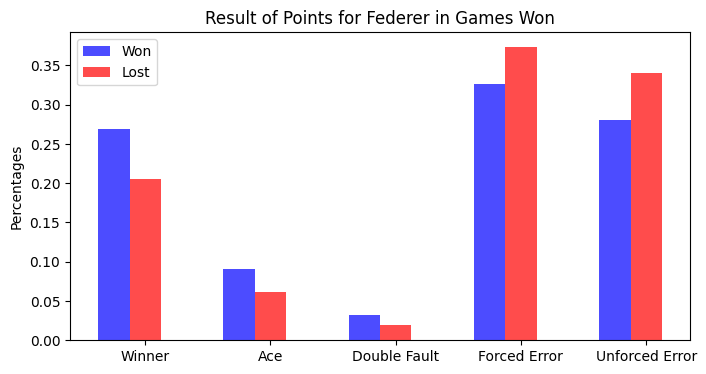

In [13]:
PlotGraph(data,'cl',PointTypees,'Won')

# Saques e Recepções

In [14]:
FedererServesPoints = FedererPoints[FedererPoints['Server'] == True]
FedererReceptionPoints = FedererPoints[FedererPoints['Server'] == False]

FedererServesW = FedererServesPoints[FedererServesPoints['Victor'] == True]
FedererServesL = FedererServesPoints[FedererServesPoints['Victor'] == False]

FedererReceptionW= FedererReceptionPoints[FedererReceptionPoints['Victor'] == True]
FedererReceptionL= FedererReceptionPoints[FedererReceptionPoints['Victor'] == False]

# Games e Sets Stats

In [15]:
FedererServePointsGameW = FedererServesPoints[FedererServesPoints['GameWinner'] == True]
FedererServePointsGameL = FedererServesPoints[FedererServesPoints['GameWinner'] == False]

FedererServePointsSetW = FedererServesPoints[FedererServesPoints['SetWinner'] == True]
FedererServePointsSetL = FedererServesPoints[FedererServesPoints['SetWinner'] == False]

FedererReceptionPointsGameW = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == True]
FedererReceptionPointsGameL = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == False]

FedererReceptionPointsSetW = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == True]
FedererReceptionPointsSetL = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == False]

In [16]:
SetDict = DivisionSets(FedererPoints,FedererPoints['match_id'].unique())

In [17]:
def MeanPoints(division):
    Mean = 0
    Divisions = []
    num_divisions = 0
    for k in division.keys():
        divisions = 0
        Match = division[k]
        divisions = len(Match)
        num_divisions += divisions

        for d in Match:
            Mean += len(d)
        
        Divisions.append(divisions)
    
    return (Mean/num_divisions, Divisions)

# Visualizações

In [18]:
court = GetCourt('Grass')

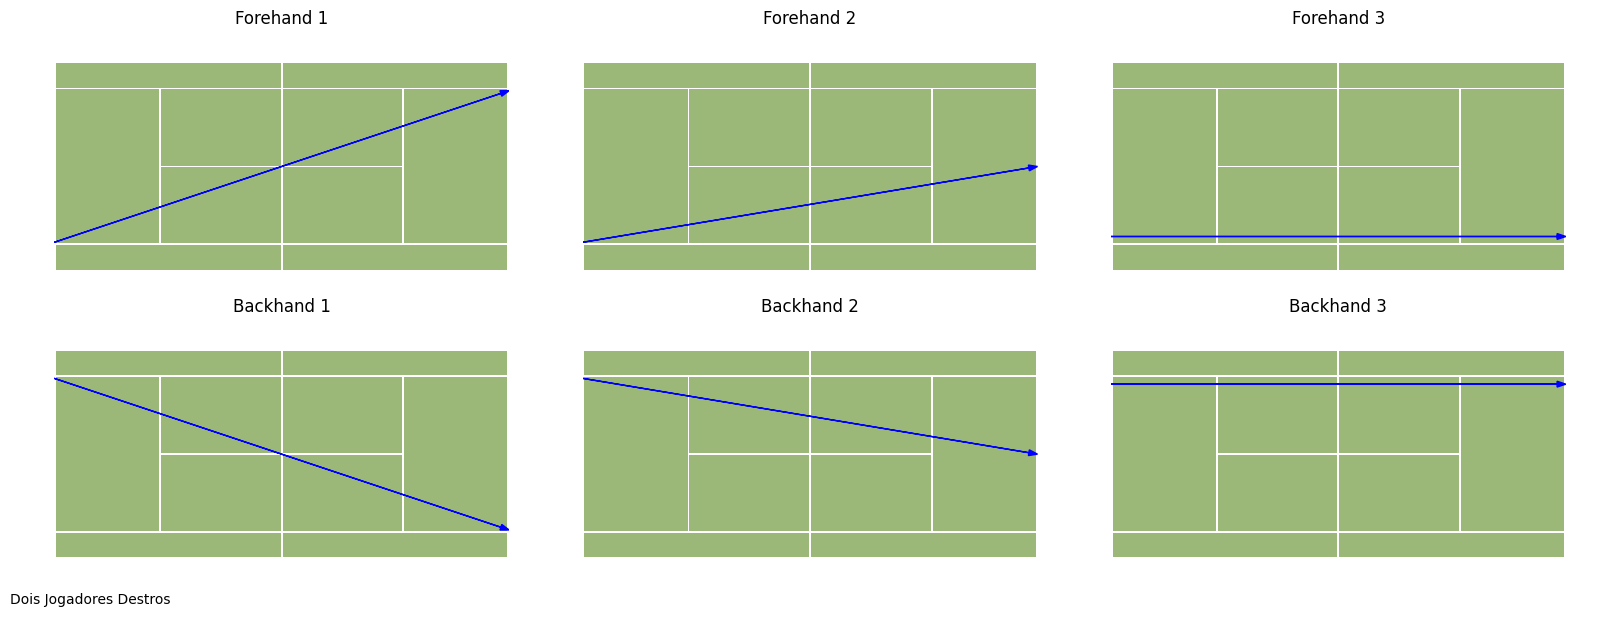

In [19]:
fig, ax = plt.subplots(figsize=(16,6),nrows=(2),ncols=(3))

ax[0][0].set_title('Forehand 1')
ax[0][1].set_title('Forehand 2')
ax[0][2].set_title('Forehand 3')
court.draw(ax=ax[0][0],display_range='full')
court.draw(ax=ax[0][1],display_range='full')
court.draw(ax=ax[0][2],display_range='full')
court.arrow(ax=ax[0][0],x1= -39.0, y1= -13.0, x2=39.0, y2=13.0,color= 'blue')
court.arrow(ax=ax[0][1],x1= -39.0, y1= -13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[0][2],x1= -39.0, y1= -12.0, x2=39.0, y2=-12.0,color= 'blue')

ax[1][0].set_title('Backhand 1')
ax[1][1].set_title('Backhand 2')
ax[1][2].set_title('Backhand 3')
court.draw(ax=ax[1][0],display_range='full')
court.draw(ax=ax[1][1],display_range='full')
court.draw(ax=ax[1][2],display_range='full')
court.arrow(ax=ax[1][0],x1= -39.0, y1= 13.0, x2=39.0, y2=-13.0,color= 'blue')
court.arrow(ax=ax[1][1],x1= -39.0, y1= 13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[1][2],x1= -39.0, y1= 12.0, x2=39.0, y2=12.0,color= 'blue')

axes = ax.ravel()

fig.tight_layout()
fig.text(s='Dois Jogadores Destros',y=0.0,x=0.0)
plt.show()

In [61]:
Sequences, Endings = Sequencer(FedererServePointsGameW)
Patterns = CallPrefixSpan(Sequences, 100, k=3)
SortedPatterns = SortPatterns(Patterns)

In [29]:
result = [check_list_contained(SortedPatterns[0][1],s) for s in Sequences]

In [90]:
count = 0
res = []
for r in result:

    if(r == True):
        res.append((Sequences[count],Endings[count]))
    
    count+=1

In [91]:
forced = []
for seq, ending in res:
    if(ending[-1]) == 'Winner':
        forced.append(seq)


In [58]:
Winners = FedererPointsInWins[FedererPointsInWins['Winner'] == True]
Sequences, Endings = Sequencer(Winners)

In [59]:
Winner_Patterns = CallPrefixSpan(Sequences, 100, k=3)
SortedPatterns = SortPatterns(Winner_Patterns)

In [60]:
SortedPatterns[0]

(509, ['Wide Serve', 'Forehand Cruzado', 'Forehand Paralelo'])